In [ ]:
#conda install -c conda-forge imbalanced-learn

In [1]:
import sklearn as sklearn
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
def defult_RandForest(xx_train,yy_train,xx_test,yy_test):

    clf = RandomForestClassifier(max_depth=10, random_state=0)
    clf.fit(xx_train, yy_train)

    print('Train accuracy',clf.score(xx_train, yy_train))
    print('Test accuracy',clf.score(xx_test, yy_test))
    print('F1-scores for class 0 and 1 are: ',f1_score(yy_test, clf.predict(xx_test), average=None))
    ConfusionMatrixDisplay.from_estimator(clf,xx_test,yy_test,normalize='true',cmap=plt.cm.Blues)

    print('Confusion matrix: ',confusion_matrix(yy_test,clf.predict(xx_test)))

In [35]:
def function_preprocess(input):
    cat_col=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
    num_col=input.columns[0:10]
    input[['Weekend','Revenue']]=input[['Weekend','Revenue']].astype('int64')
    input[cat_col]=input[cat_col].astype("category")
    col_hot_encoding=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
    from sklearn.preprocessing import OneHotEncoder
    en=OneHotEncoder(handle_unknown='ignore', sparse=False)
    x=en.fit_transform(input[col_hot_encoding])
    encoded_col=pd.DataFrame(x)
    encoded_col.columns=en.get_feature_names_out()
    out=pd.concat([input[num_col], encoded_col,input[['Weekend','Revenue']]],axis=1)
    return out

In [48]:
#reading csv file as pandas dataframe
input_data=pd.read_csv('coding_round_data.csv')
cat_col=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
num_col=input_data.columns[0:10]
input_data[['Weekend','Revenue']]=input_data[['Weekend','Revenue']].astype('int64')
input_data[cat_col]=input_data[cat_col].astype("category")
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
ct = ColumnTransformer([("power_trans", PowerTransformer(), slice(0,10)),("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False), slice(10,16))],remainder='passthrough')
#ct = ColumnTransformer([("MinMaxScaler", MinMaxScaler(), slice(0,10)),("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False), slice(10,16))],remainder='passthrough')
ct.fit_transform(input_data)
input_ready_2=pd.DataFrame(ct.fit_transform(input_data))
#input_ready_2.columns=ct.get_feature_names_out()

In [162]:
input_ready_2.columns=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend', 'Revenue']

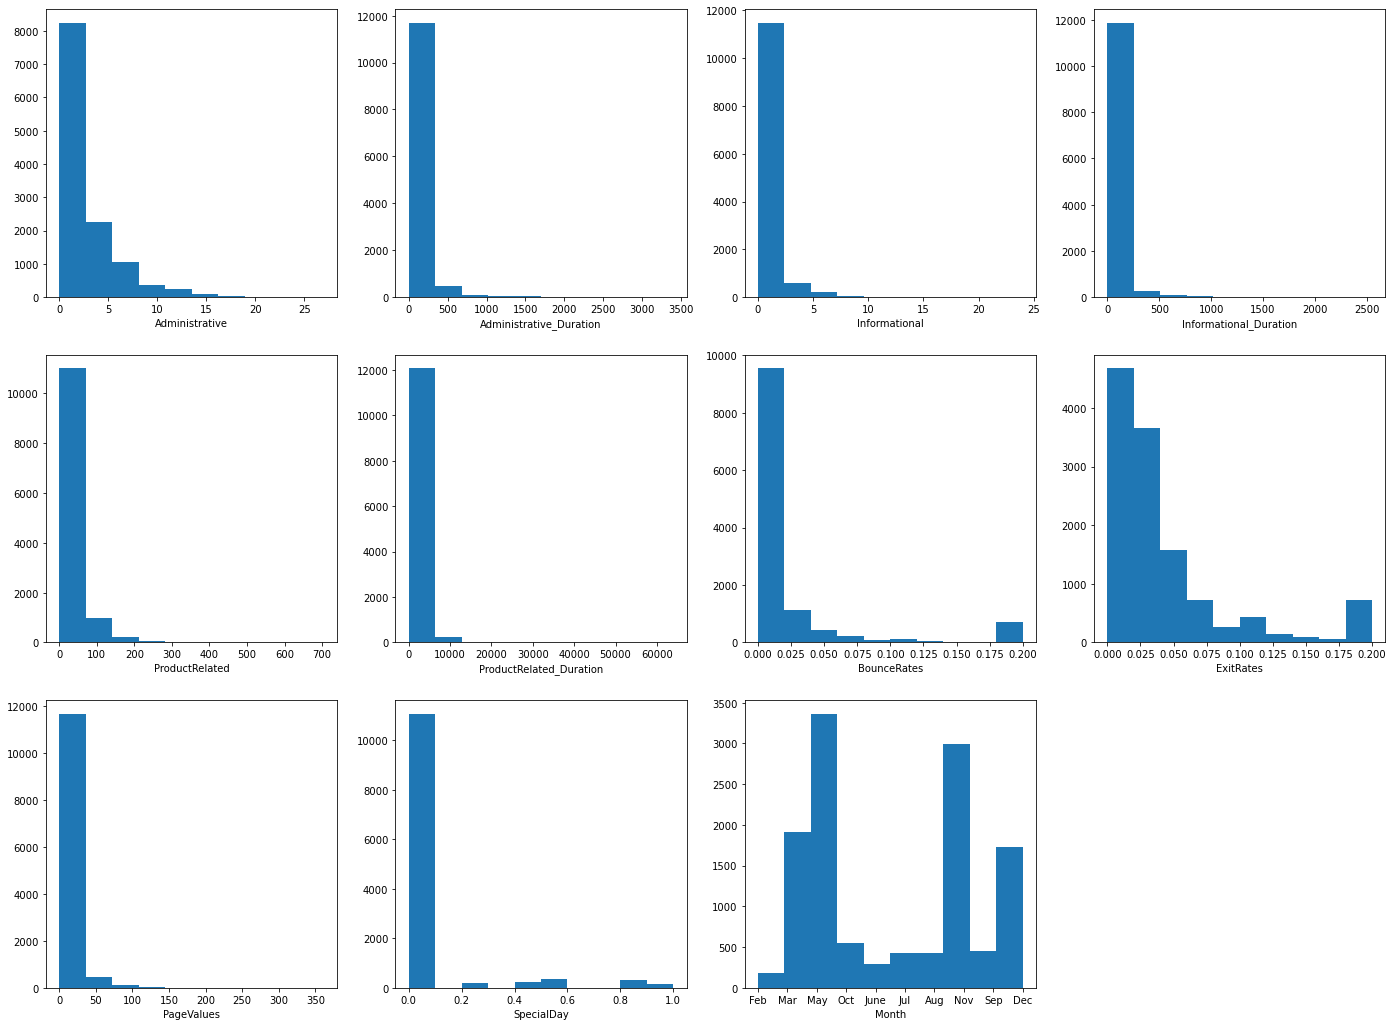

In [163]:
plt.figure(figsize=(24,18))
for i in range(0,11):
    plt.subplot(3,4,i+1)
    plt.hist(input_data.iloc[:,i])
    plt.xlabel(input_data.columns[i])

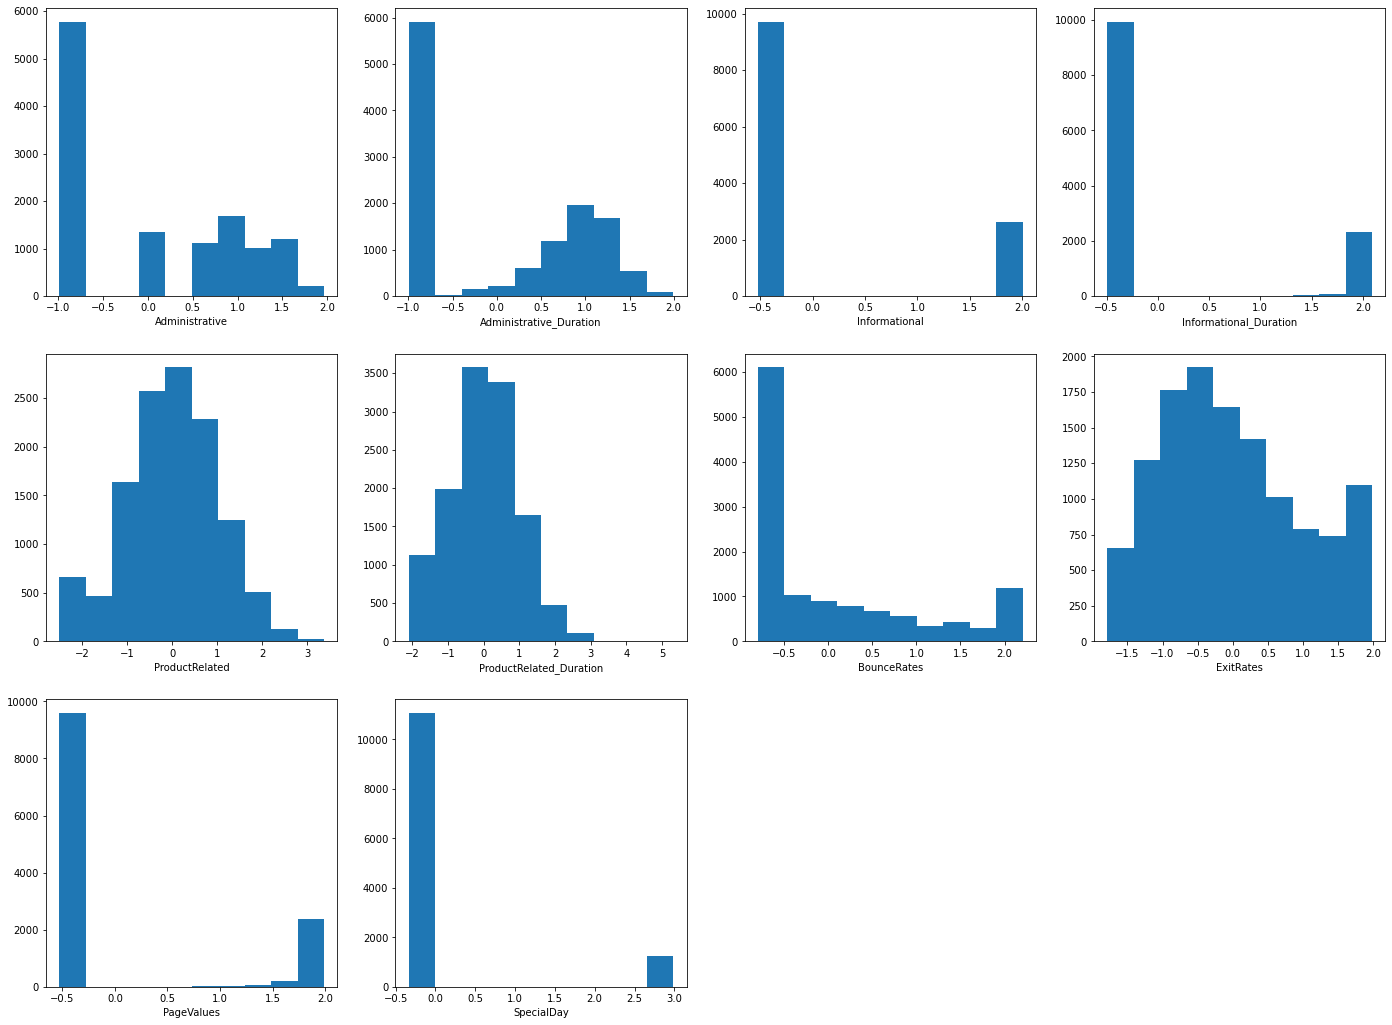

In [164]:
plt.figure(figsize=(24,18))
for i in range(0,10):
    plt.subplot(3,4,i+1)
    plt.hist(input_ready_2.iloc[:,i])
    plt.xlabel(input_ready_2.columns[i])

In [166]:
from sklearn.model_selection import train_test_split
input_train, input_test= train_test_split(input_ready_2, test_size=1/3, random_state=42)
input_train.reset_index(inplace=True)
input_test.reset_index(inplace=True)
x_train=input_train.iloc[:,0:75]
y_train=input_train.iloc[:,75]
x_test=input_test.iloc[:,0:75]
y_test=input_test.iloc[:,75]
print('no.  of train instances: ',len(x_train.index))
print('no.  of test instances: ',len(x_test.index))

no.  of train instances:  8220
no.  of test instances:  4110


In [167]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
sm_strategy=1
rus = RandomUnderSampler(random_state=42)# fit predictor and target variable
ros = RandomOverSampler(random_state=42)
comb_over=RandomOverSampler(random_state=42,sampling_strategy=sm_strategy)
comb_under=RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x_train, y_train)
x_ros, y_ros = ros.fit_resample(x_train, y_train)
x_comb, y_comb = comb_over.fit_resample(x_train, y_train)
x_comb, y_comb = comb_under.fit_resample(x_comb, y_comb)

(array([6956.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6956.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

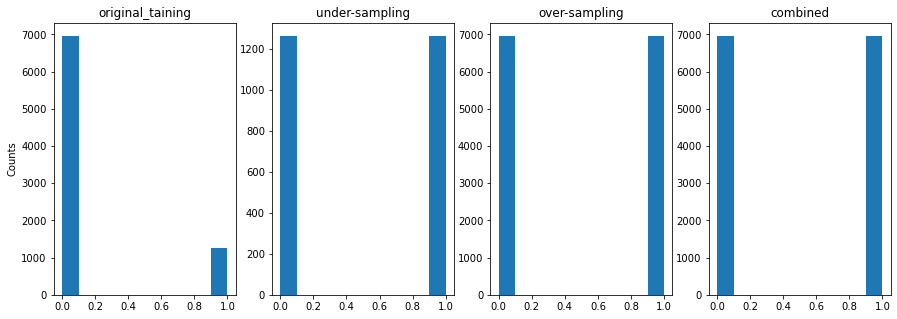

In [168]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.title('original_taining')
plt.hist(y_train)
plt.ylabel('Counts')
plt.subplot(1, 4, 2)
plt.title('under-sampling')
plt.hist(y_rus)
plt.subplot(1, 4, 3)
plt.title('over-sampling')
plt.hist(y_ros)
plt.subplot(1, 4, 4)
plt.title('combined')
plt.hist(y_comb)

C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


avg cv f1 score: 0.7942129677167509
F1-scores for class 0 and 1 on test sets are :  [0.56594427 0.37688889]


C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


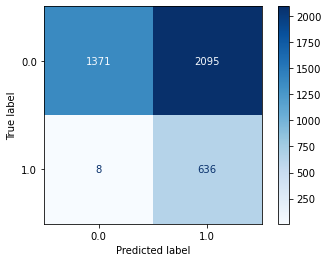

In [169]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
clf_lsvc = LinearSVC(random_state=0,tol=1e-5,C=1,max_iter=10000)
cv=cross_validate(clf_lsvc, x_rus, y_rus, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

avg cv f1 score: 0.5208818606976917
F1-scores for class 0 and 1 on test sets are :  [0.73910899 0.25737015]


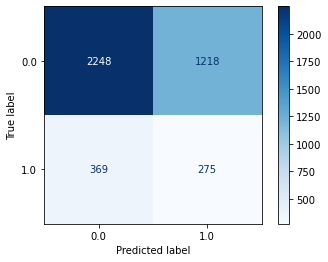

In [179]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=10)
from sklearn.model_selection import cross_validate
cv=cross_validate(clf_neigh, x_rus, y_rus, cv=5,scoring='f1_weighted',return_estimator='true')
print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
clf_svc = SVC(random_state=0,gamma='auto',C=10,kernel='poly')
cv=cross_validate(clf_svc, x_rus, y_rus, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

avg cv f1 score: 0.9062915368718876
F1-scores for class 0 and 1 on test sets are :  [0.92001207 0.66750314]


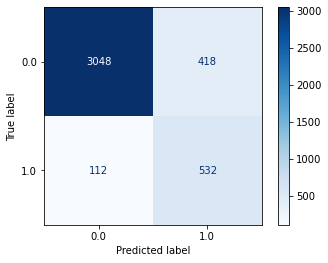

In [180]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
cv=cross_validate(clf, x_ros, y_ros, cv=5,scoring='f1_weighted',return_estimator='true')

print('avg cv f1 score:',cv['test_score'].mean())
print('F1-scores for class 0 and 1 on test sets are : ',f1_score(y_test, cv['estimator'][0].predict(x_test), average=None))
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,cmap=plt.cm.Blues)

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
rfcl = RandomForestClassifier()
parameters = {'n_estimators':[10,50,100,200,500],'max_depth':[4,8,12,16,20,30],'min_samples_split':[2,10,20,40],'n_jobs':[6]}
clf = RandomizedSearchCV(rfcl, parameters,n_iter=200,cv=5,scoring='f1_weighted',random_state=42)
search = clf.fit(x_rus, y_rus)

C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 120 is smaller than n_iter=200. Running 120 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


F1-scores for class 0 and 1 are:  [0.9065478  0.64527421]


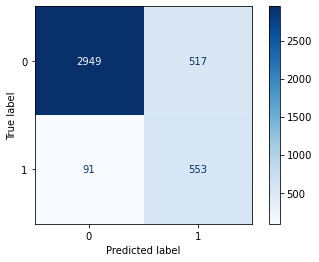

In [135]:
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_test,y_test,normalize='true',cmap=plt.cm.Blues)
print('F1-scores for class 0 and 1 are: ',f1_score(y_test, search.best_estimator_.predict(x_test), average=None))

In [148]:
from sklearn.neighbors import KNeighborsClassifier
kn_cl=KNeighborsClassifier(n_neighbors=30, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
kn_cl.fit(x_rus, y_rus)

KNeighborsClassifier(n_neighbors=30)

F1-scores for class 0 and 1 are:  [0.71093888 0.35469917]


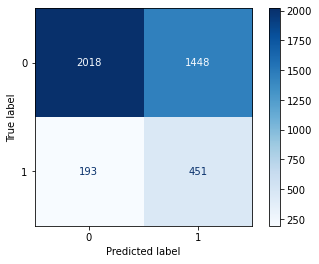

In [149]:
ConfusionMatrixDisplay.from_estimator(kn_cl,x_test,y_test,normalize=None,cmap=plt.cm.Blues)
print('F1-scores for class 0 and 1 are: ',f1_score(y_test, kn_cl.predict(x_test), average=None))

In [162]:
from sklearn.neural_network import MLPClassifier
mlp_cl=MLPClassifier(random_state=42, max_iter=400,learning_rate_init=0.001)
mlp_cl.fit(x_ros, y_ros)

MLPClassifier(max_iter=400, random_state=42)

F1-scores for class 0 and 1 are:  [0.71093888 0.35469917]


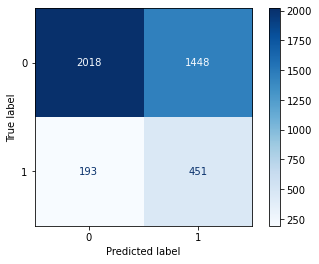

In [163]:
ConfusionMatrixDisplay.from_estimator(kn_cl,x_test,y_test,normalize=None,cmap=plt.cm.Blues)
print('F1-scores for class 0 and 1 are: ',f1_score(y_test, kn_cl.predict(x_test), average=None))

In [168]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_rus, y_rus)

C:\Users\hosseind\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


F1-scores for class 0 and 1 are:  [0.90552442 0.02479339]


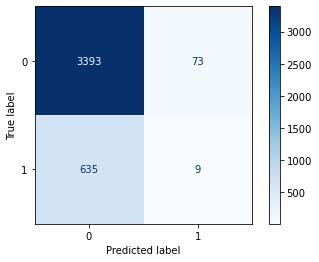

In [169]:
ConfusionMatrixDisplay.from_estimator(gpc,x_test,y_test,normalize=None,cmap=plt.cm.Blues)
print('F1-scores for class 0 and 1 are: ',f1_score(y_test, gpc.predict(x_test), average=None))